In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.dummy import DummyClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
import time
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, f1_score, precision_score, recall_score
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input
from sklearn.preprocessing import LabelEncoder

print('Libraries ready')

Libraries ready


In [2]:
#Loading the data
df = pd.read_csv('realtor-data.csv')

In [3]:
# Drop all rows with missing values to ensure clean and complete data for modeling
df = df.dropna()
# Display the number of missing (NaN) values in each column of the dataset
print(df.isnull().sum())

brokered_by       0
status            0
price             0
bed               0
bath              0
acre_lot          0
street            0
city              0
state             0
zip_code          0
house_size        0
prev_sold_date    0
dtype: int64


In [4]:
#Display the first few rows
df.head()

,brokered_by,status,price,bed,bath,acre_lot,street,city,state,zip_code,house_size,prev_sold_date
502,92147.0,for_sale,110000.0,7.0,3.0,0.09,1842706.0,Dorado,Puerto Rico,949.0,1192.0,2019-06-28
2270,94933.0,for_sale,950000.0,5.0,4.0,0.99,1260473.0,Saint Thomas,Virgin Islands,802.0,5000.0,2013-10-11
2277,103341.0,for_sale,6899000.0,4.0,6.0,0.83,17467.0,Saint Thomas,Virgin Islands,802.0,4600.0,2018-04-05
3409,21163.0,for_sale,525000.0,3.0,3.0,0.45,1813270.0,Agawam,Massachusetts,1001.0,2314.0,2014-06-25
3410,67455.0,for_sale,289900.0,3.0,2.0,0.36,1698080.0,Agawam,Massachusetts,1001.0,1276.0,2012-10-12


In [5]:
#Get information about the dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1084909 entries, 502 to 2226381
Data columns (total 12 columns):
 #   Column          Non-Null Count    Dtype  
---  ------          --------------    -----  
 0   brokered_by     1084909 non-null  float64
 1   status          1084909 non-null  object 
 2   price           1084909 non-null  float64
 3   bed             1084909 non-null  float64
 4   bath            1084909 non-null  float64
 5   acre_lot        1084909 non-null  float64
 6   street          1084909 non-null  float64
 7   city            1084909 non-null  object 
 8   state           1084909 non-null  object 
 9   zip_code        1084909 non-null  float64
 10  house_size      1084909 non-null  float64
 11  prev_sold_date  1084909 non-null  object 
dtypes: float64(8), object(4)
memory usage: 107.6+ MB


In [6]:
#Display a statistical summary
df.describe()

,brokered_by,price,bed,bath,acre_lot,street,zip_code,house_size
count,1.084909e+06,1.084909e+06,1.084909e+06,1.084909e+06,1.084909e+06,1.084909e+06,1.084909e+06,1.084909e+06
mean,5.357678e+04,5.687041e+05,3.363451e+00,2.519739e+00,1.195407e+01,9.291065e+05,5.589184e+04,2.074974e+03
std,3.047812e+04,1.181611e+06,1.363310e+00,1.305497e+00,7.953078e+02,5.295896e+05,2.994955e+04,2.767609e+03
min,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,9.700000e+01,6.020000e+02,1.000000e+02
25%,2.425500e+04,2.400000e+05,3.000000e+00,2.000000e+00,1.400000e-01,4.688700e+05,3.022300e+04,1.347000e+03
50%,5.301600e+04,3.800000e+05,3.000000e+00,2.000000e+00,2.100000e-01,9.320000e+05,5.544600e+04,1.792000e+03
75%,7.922100e+04,6.000000e+05,4.000000e+00,3.000000e+00,4.100000e-01,1.388381e+06,8.521500e+04,2.438000e+03
max,1.101420e+05,5.150000e+08,4.440000e+02,2.220000e+02,1.000000e+05,2.001125e+06,9.990100e+04,1.560780e+06


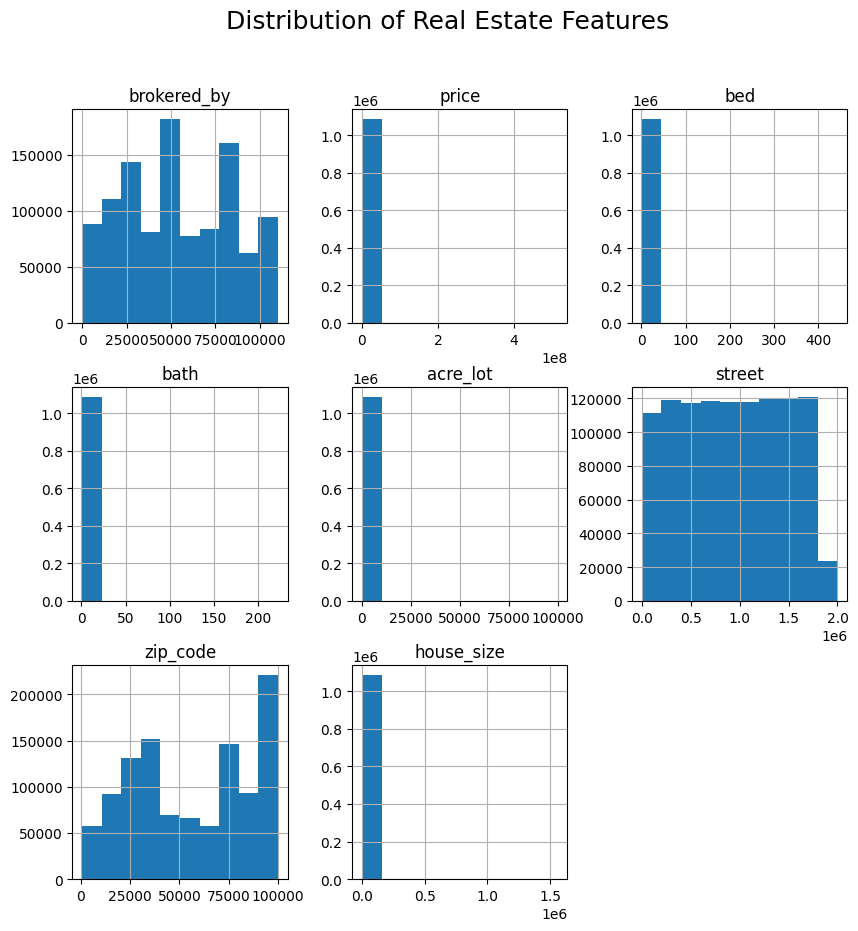

In [7]:
# Plot histogram for all numerical columns in the Dataframe to visualize their distributions
df.hist(figsize=(10, 10))
plt.suptitle('Distribution of Real Estate Features', fontsize=18)
#plt.tight_layout()
plt.show()

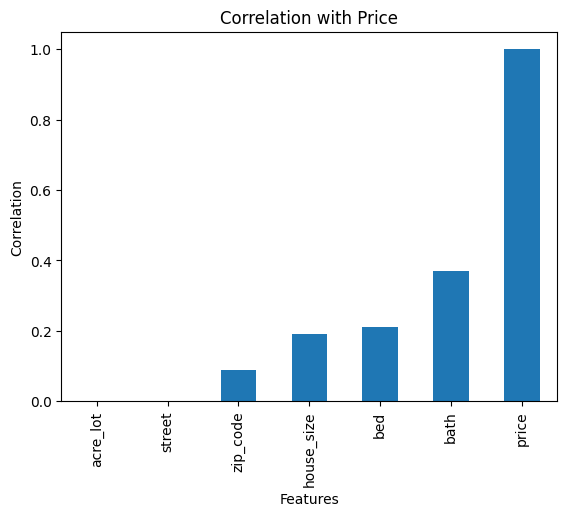

In [8]:
#Plot correlation of price with other features
corr = df.corr(numeric_only=True).round(2)
corr['price'][1:].sort_values().plot(kind='bar')
plt.title('Correlation with Price')
plt.xlabel('Features')
plt.ylabel('Correlation')
plt.show()

Text(0, 0.5, 'Frequency')

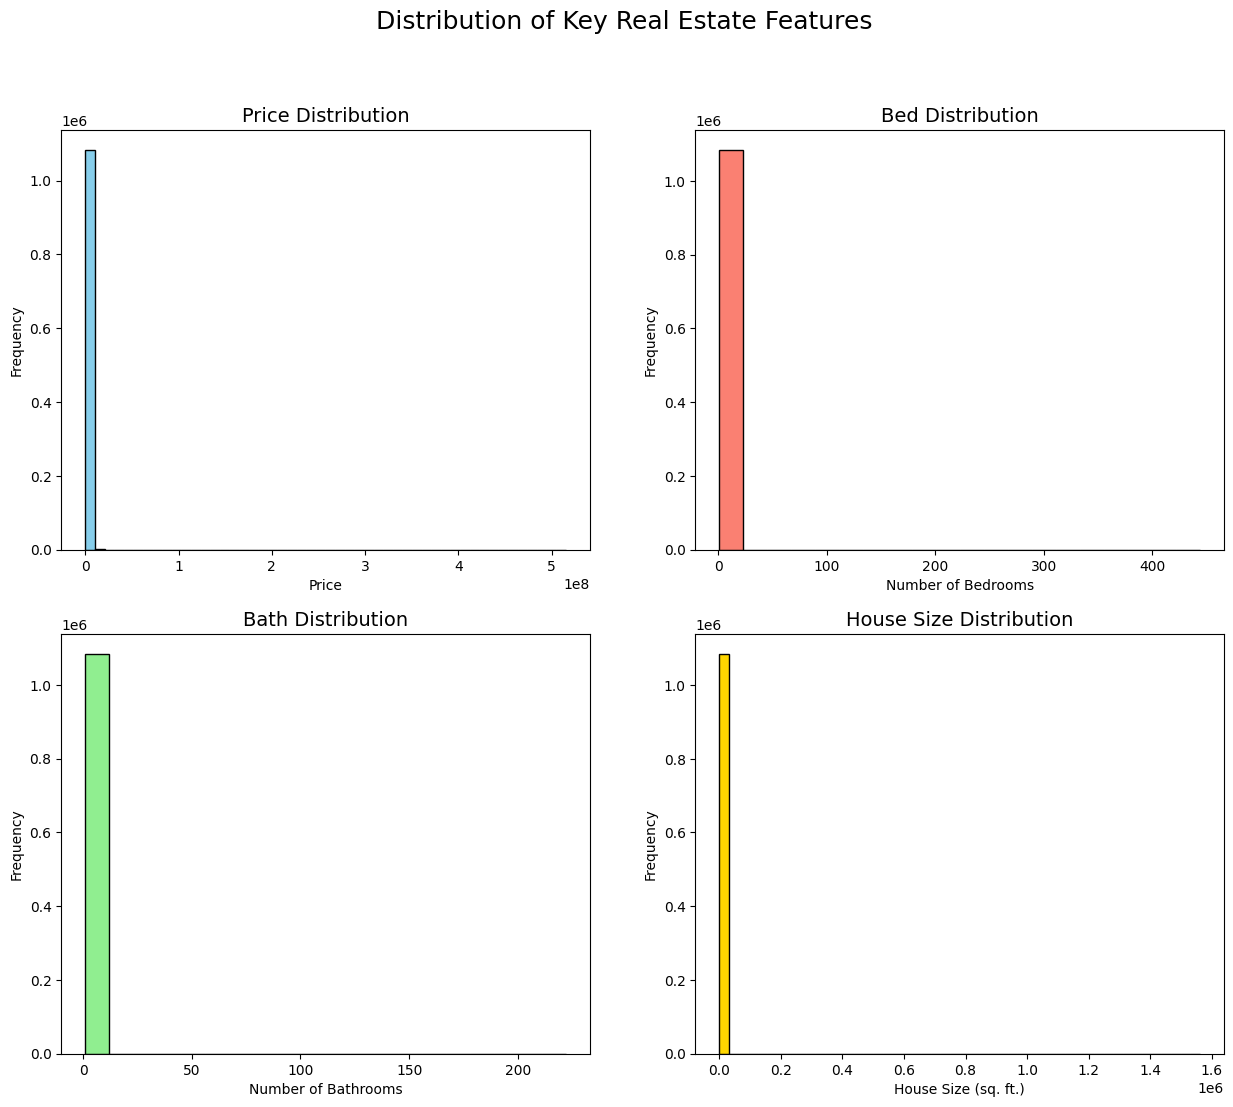

In [9]:
# Create a figure and a 2x2 grid of subplots for histograms
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15, 12))
fig.suptitle('Distribution of Key Real Estate Features', fontsize=18)

# Plot histograms on each subplot
axes[0, 0].hist(df['price'], bins=50, color='skyblue', edgecolor='black')
axes[0, 0].set_title('Price Distribution', fontsize=14)
axes[0, 0].set_xlabel('Price')
axes[0, 0].set_ylabel('Frequency')

axes[0, 1].hist(df['bed'], bins=20, color='salmon', edgecolor='black')
axes[0, 1].set_title('Bed Distribution', fontsize=14)
axes[0, 1].set_xlabel('Number of Bedrooms')
axes[0, 1].set_ylabel('Frequency')

axes[1, 0].hist(df['bath'], bins=20, color='lightgreen', edgecolor='black')
axes[1, 0].set_title('Bath Distribution', fontsize=14)
axes[1, 0].set_xlabel('Number of Bathrooms')
axes[1, 0].set_ylabel('Frequency')

axes[1, 1].hist(df['house_size'], bins=50, color='gold', edgecolor='black')
axes[1, 1].set_title('House Size Distribution', fontsize=14)
axes[1, 1].set_xlabel('House Size (sq. ft.)')
axes[1, 1].set_ylabel('Frequency')

In [10]:
#Describe price baseline
print(df['price'].describe().round(2))

count    1.084909e+06
mean     5.687041e+05
std      1.181611e+06
min      1.000000e+00
25%      2.400000e+05
50%      3.800000e+05
75%      6.000000e+05
max      5.150000e+08
Name: price, dtype: float64


In [11]:
#Create price categories
bins = [0, 200000, 500000, 1000000, float('inf')]
labels = ['Low', 'Medium', 'High', 'Luxury']
df['price_category'] = pd.cut(df['price'], bins=bins, labels=labels)

print(df['price_category'].value_counts())

price_category
Medium    522401
High      260194
Low       201051
Luxury    101263
Name: count, dtype: int64


In [12]:
# Copy dataset
df_encoded = df.copy()

# Label encode high-cardinality columns
label_cols = ['city', 'state', 'street']
le = LabelEncoder()
for col in label_cols:
    df_encoded[col] = le.fit_transform(df_encoded[col])

# One-hot encode small categorical columns
df_encoded = pd.get_dummies(df_encoded, columns=['status'], drop_first=True)

# Features & target
X = df_encoded.drop(['price', 'prev_sold_date', 'price_category'], axis=1)
y = df_encoded['price_category']

In [13]:
#Split data into train & test
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

In [14]:
#Scale numerical features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [15]:
# Train Logistic regression
log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train, y_train)

#Evaluate
y_pred = log_reg.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy: 0.5901365090191814
              precision    recall  f1-score   support

        High       0.52      0.35      0.42     52039
         Low       0.65      0.37      0.48     40210
      Luxury       0.71      0.31      0.43     20253
      Medium       0.59      0.85      0.70    104480

    accuracy                           0.59    216982
   macro avg       0.62      0.47      0.51    216982
weighted avg       0.60      0.59      0.56    216982



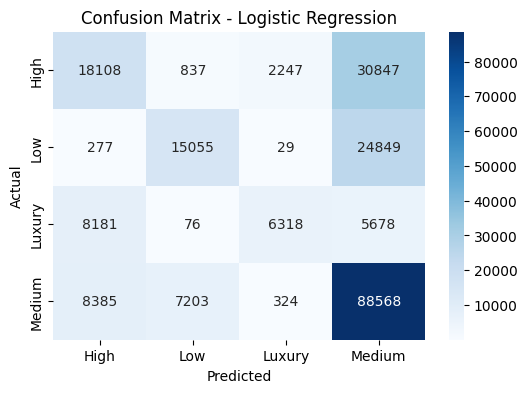

In [16]:
#Confusion Matrix
cm = confusion_matrix(y_test, y_pred, labels=log_reg.classes_)
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=log_reg.classes_,
            yticklabels=log_reg.classes_)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - Logistic Regression")
plt.show()

In [17]:
# Helper: evaluate model and return metrics dict
def evaluate_model(name, model, X_test, y_test, labels=None, plot_cm=True):
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred, average='weighted', zero_division=0)
    rec = recall_score(y_test, y_pred, average='weighted', zero_division=0)
    f1 = f1_score(y_test, y_pred, average='weighted', zero_division=0)
    print(f"--- {name} ---")
    print(f"Accuracy: {acc:.4f}")
    print(classification_report(y_test, y_pred, zero_division=0))
    if plot_cm:
        cm = confusion_matrix(y_test, y_pred)
        plt.figure(figsize=(6,5))
        sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
        plt.xlabel('Predicted'); plt.ylabel('Actual'); plt.title(f'Confusion Matrix: {name}')
        plt.show()
    return {'model': name, 'accuracy': acc, 'precision': prec, 'recall': rec, 'f1': f1}


Fitting 5 folds for each of 4 candidates, totalling 20 fits
Best DecisionTree params: {'clf__max_depth': 10, 'clf__min_samples_split': 10}
--- Decision Tree (GridSearch) ---
Accuracy: 0.7204
              precision    recall  f1-score   support

        High       0.67      0.63      0.65     52039
         Low       0.77      0.59      0.67     40210
      Luxury       0.75      0.58      0.66     20253
      Medium       0.73      0.84      0.78    104480

    accuracy                           0.72    216982
   macro avg       0.73      0.66      0.69    216982
weighted avg       0.72      0.72      0.72    216982



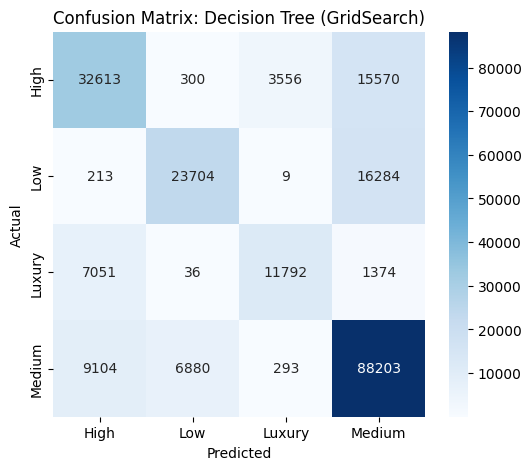

In [18]:
# Decision Tree with GridSearchCV
dt_pipeline = Pipeline([('scaler', StandardScaler()), ('clf', DecisionTreeClassifier(random_state=42))])

dt_param_grid = {
    'clf__max_depth': [5, 10],
    'clf__min_samples_split': [2, 10],
}

dt_grid = GridSearchCV(dt_pipeline, dt_param_grid, cv=5, scoring='accuracy', verbose=1)
dt_grid.fit(X_train, y_train)

print('Best DecisionTree params:', dt_grid.best_params_)
dt_best = dt_grid.best_estimator_
dt_metrics = evaluate_model('Decision Tree (GridSearch)', dt_best, X_test, y_test, labels=np.unique(y_test))

Fitting 3 folds for each of 3 candidates, totalling 9 fits
Best KNN params: {'knn__n_neighbors': 7, 'knn__weights': 'uniform'}
--- KNN (GridSearch) ---
Accuracy: 0.6442
              precision    recall  f1-score   support

        High       0.54      0.56      0.55     52039
         Low       0.67      0.58      0.62     40210
      Luxury       0.62      0.46      0.53     20253
      Medium       0.69      0.74      0.71    104480

    accuracy                           0.64    216982
   macro avg       0.63      0.59      0.61    216982
weighted avg       0.64      0.64      0.64    216982



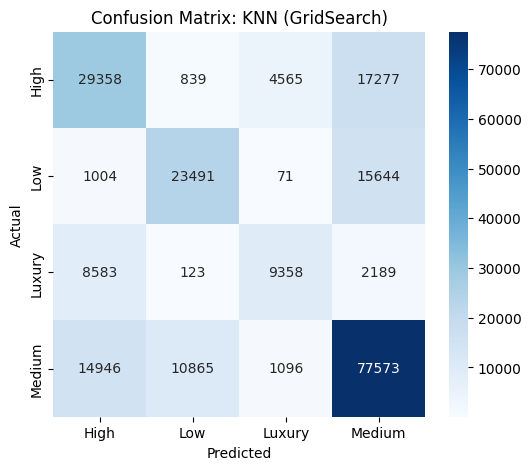

In [19]:
# k-NN with GridSearchCV
knn_pipeline = Pipeline([('scaler', StandardScaler()), ('knn', KNeighborsClassifier())])
knn_param_grid = {
    'knn__n_neighbors': [3, 5, 7],
    'knn__weights': ['uniform'],
}
knn_grid = GridSearchCV(knn_pipeline, knn_param_grid, cv=3, scoring='accuracy', verbose=1)
knn_grid.fit(X_train, y_train)

print('Best KNN params:', knn_grid.best_params_)
knn_best = knn_grid.best_estimator_
knn_metrics = evaluate_model('KNN (GridSearch)', knn_best, X_test, y_test, labels=np.unique(y_test))

Fitting 2 folds for each of 3 candidates, totalling 6 fits
Best SVM params: {'svc__gamma': 0.1, 'svc__C': 10}
--- SVM (Fast RandomizedSearch) ---
Accuracy: 0.5962
              precision    recall  f1-score   support

        High       0.50      0.47      0.48     52039
         Low       0.67      0.40      0.50     40210
      Luxury       0.57      0.31      0.40     20253
      Medium       0.62      0.79      0.70    104480

    accuracy                           0.60    216982
   macro avg       0.59      0.49      0.52    216982
weighted avg       0.60      0.60      0.58    216982



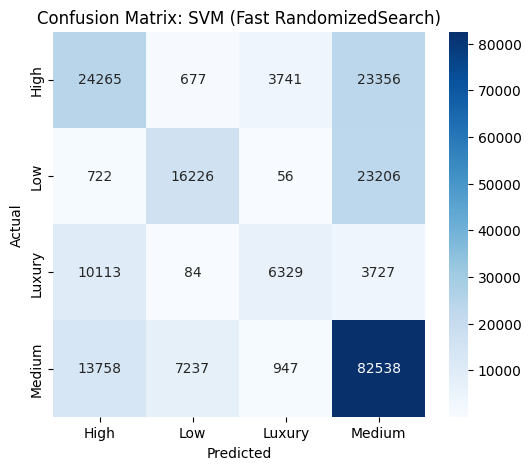

In [20]:
# SVM with RandomizedSearchCV
from scipy.stats import expon, uniform

svm_pipeline = Pipeline([('scaler', StandardScaler()), ('svc', SVC(kernel='rbf'))])

# Smaller search space
param_dist = {
    'svc__C': [0.1, 1, 10],
    'svc__gamma': ['scale', 0.1],
}

# Fewer iterations and folds
svm_search = RandomizedSearchCV(svm_pipeline, param_distributions=param_dist, n_iter=3, cv=2, scoring='accuracy', random_state=42, n_jobs=-1, verbose=1)

# Fit on a smaller subset
X_small = X_train[:2000]
y_small = y_train[:2000]

svm_search.fit(X_small, y_small)

print('Best SVM params:', svm_search.best_params_)
svm_best = svm_search.best_estimator_
svm_metrics = evaluate_model('SVM (Fast RandomizedSearch)', svm_best, X_test, y_test, labels=np.unique(y_test))

In [21]:
# Set seeds for reproducibility
tf.random.set_seed(42)
np.random.seed(42)

# Encode labels as integers
le = LabelEncoder()
y_train_enc = le.fit_transform(y_train)
y_test_enc = le.transform(y_test)

# Multi-class classification network
num_classes = len(np.unique(y_train_enc))

model = Sequential([
    Input(shape=(X_train.shape[1],)),
    Dense(100, activation='relu'),
    Dense(num_classes, activation='softmax')
])

model.compile(loss='sparse_categorical_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

# Train model
history = model.fit(X_train, y_train_enc,
                    validation_data=(X_test, y_test_enc),
                    epochs=20,
                    batch_size=10,
                    verbose=1)

# Evaluate
loss, acc = model.evaluate(X_test, y_test_enc, verbose=0)
print(f"Simple NN (Multi-class) Test Accuracy: {acc:.4f}")

Epoch 1/20
86793/86793 ━━━━━━━━━━━━━━━━━━━━ 184s 2ms/step - accuracy: 0.6257 - loss: 0.9156 - val_accuracy: 0.6419 - val_loss: 0.8389
Epoch 2/20
86793/86793 ━━━━━━━━━━━━━━━━━━━━ 185s 2ms/step - accuracy: 0.6431 - loss: 0.8391 - val_accuracy: 0.6457 - val_loss: 0.8401
Epoch 3/20
86793/86793 ━━━━━━━━━━━━━━━━━━━━ 183s 2ms/step - accuracy: 0.6479 - loss: 0.8483 - val_accuracy: 0.6457 - val_loss: 0.8580
Epoch 4/20
86793/86793 ━━━━━━━━━━━━━━━━━━━━ 187s 2ms/step - accuracy: 0.6489 - loss: 0.8742 - val_accuracy: 0.6424 - val_loss: 0.8746
Epoch 5/20
86793/86793 ━━━━━━━━━━━━━━━━━━━━ 184s 2ms/step - accuracy: 0.6475 - loss: 0.8973 - val_accuracy: 0.6433 - val_loss: 0.8901
Epoch 6/20
86793/86793 ━━━━━━━━━━━━━━━━━━━━ 203s 2ms/step - accuracy: 0.6462 - loss: 0.9290 - val_accuracy: 0.6424 - val_loss: 0.9040
Epoch 7/20
86793/86793 ━━━━━━━━━━━━━━━━━━━━ 194s 2ms/step - accuracy: 0.6437 - loss: 0.9568 - val_accuracy: 0.6392 - val_loss: 0.9284
Epoch 8/20
86793/86793 ━━━━━━━━━━━━━━━━━━━━ 183s 2ms/step - ac

,accuracy,precision,recall,f1
model,,,,
Decision Tree (GridSearch),0.720392,0.721837,0.720392,0.715676
KNN (GridSearch),0.644201,0.643277,0.644201,0.641644
SVM (Fast RandomizedSearch),0.596169,0.595801,0.596169,0.581357


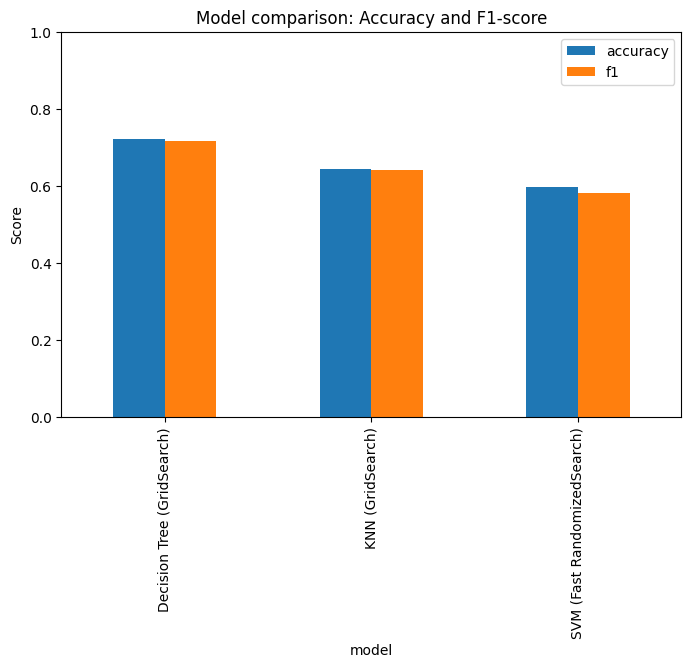

In [22]:
# Compile metrics from models into a DataFrame and plot comparison
metrics_list = []
for m in ['dt_metrics','knn_metrics','svm_metrics','nn_metrics']:
    if m in globals():
        metrics_list.append(globals()[m])

if len(metrics_list) > 0:
    results_df = pd.DataFrame(metrics_list).set_index('model')
    display(results_df)
    # Bar plot for accuracy & f1
    results_df[['accuracy','f1']].plot.bar(figsize=(8,5))
    plt.title('Model comparison: Accuracy and F1-score')
    plt.ylabel('Score')
    plt.ylim(0,1)
    plt.show()
else:
    print('No model metrics found yet. Run the model cells to populate metrics.')